In [ ]:
# ## https://biopython-cn.readthedocs.io/zh_CN/latest/cn/chr11.html
# from Bio.PDB.PDBParser import PDBParser

# p = PDBParser()
# s = p.get_structure('7n0r','7n0r.pdb')

# s

In [ ]:
# pie_values = [33,1,1,54,7,8,1,1,33,1,1,54,7,4,1,7,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]
# pie_labels = ['Spe Axxxxxxxx {}'.format(i+1) for i in range(len(pie_values))]
# title_text = 'Phylum XXX'


# fig, axes = plt.subplots(1, 3, figsize=(3*3, 3))

# wedges_0 = donut_pie(axes[0],pie_values,pie_labels,title_text,startangle = -40,anno_arrowprops = False)
# wedges_1 = donut_pie(axes[1],pie_values,pie_labels,title_text,startangle = -40,anno_arrowprops = False)
# wedges_2 = donut_pie(axes[2],pie_values,pie_labels,title_text,startangle = -40,anno_arrowprops = False)



# top_xyB,bottom_xyB = cal_pie_wedge_bounds(wedges_0[0])  
# top_xyA = (-1,1)
# bottom_xyA= (-1,-1)

# connect_axes(axes[0],axes[1],top_xyA,top_xyB,[0, 0, 0],2)
# connect_axes(axes[0],axes[1],bottom_xyA,bottom_xyB,[0, 0, 0],2)

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
from matplotlib import cycler
from ploting_func import *

%matplotlib inline

from matplotlib.patches import Ellipse


In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch

fig, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
axr.set_box_aspect(1 / 3)
axr.yaxis.set_visible(False)
axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(x), np.sin(x), "k", lw=0.3)
point, = axl.plot(0, 0, "o")

# draw full curve to set view limits in right Axes
sine, = axr.plot(x, np.sin(x))

# draw connecting line between both graphs
con = ConnectionPatch(
    (1, 0),
    (0, 0),
    "data",
    "data",
    axesA=axl,
    axesB=axr,
    color="C0",
    ls="dotted",
)
fig.add_artist(con)


def animate(i):
    x = np.linspace(0, i, int(i * 25 / np.pi))
    sine.set_data(x, np.sin(x))
    x, y = np.cos(i), np.sin(i)
    point.set_data([x], [y])
    con.xy1 = x, y
    con.xy2 = i, y
    return point, sine, con


ani = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    blit=False,  # blitting can't be used with Figure artists
    frames=x,
    repeat_delay=100,
)

plt.show()

In [ ]:
FuncAnimation?

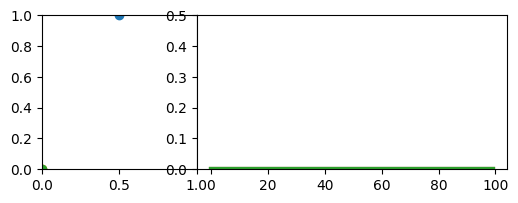

In [44]:
from matplotlib.animation import FuncAnimation
from scipy.stats import binom

fig, (ax1, ax2) = plt.subplots(
    ncols=2,
    sharey=False,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 2], wspace=0),
)

## Init objects to be updated at each frame
point, = ax1.plot(0, 0, marker='o')
line_pmf,  = ax2.plot([k for k in range(100)], [0 for k in range(100)], lw=3)

## optional
def animate_init():
    point, = ax1.plot(0, 0, marker='o')
    line_pmf,  = ax2.plot([k for k in range(100)], [0 for k in range(100)], lw=3)
    ax1.set_xlim(0,1)
    ax1.set_ylim(0,1)
    ax2.set_ylim(0,0.5)
    
## what to plot at each frame;  i:value of frames
def animate_func(i): 
    x = [k for k in range(100)]
    y_pmf = [binom.pmf(k=k,n=100,p=i) for k in x]
    y_cdf = [binom.cdf(k=k,n=100,p=i) for k in x]
    point.set_data(0.5,i)
    line_pmf.set_data(x,y_pmf)


ani = FuncAnimation(fig,
                    animate_func,
                    frames=[i*0.01 for i in range(101)],
                    init_func=animate_init,
                    fargs=None,
                    save_count=None,
                    cache_frame_data=True)

ani.save('img/animation.gif', fps=25, writer='pillow')